In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split as tts , RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids,RandomUnderSampler
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
df1=pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')

In [3]:
df1.head(20)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [4]:
df1['Annual_Income'] = df1['Annual_Income'].str.rstrip('_')

In [5]:
df1['Annual_Income'] = df1['Annual_Income'].astype(float)

In [6]:
Monthly_Inhand_Salary = df1.groupby('Customer_ID')['Monthly_Inhand_Salary'].agg(lambda x: x.value_counts().idxmax())
df1['Monthly_Inhand_Salary'] = df1['Customer_ID'].map(Monthly_Inhand_Salary)

In [7]:
df1.Credit_Score.unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [8]:
def replace_Num_Bank_Accounts(x):
    zero = 0
    value_counts = x.value_counts()
    if 0 in value_counts:
        value_counts = value_counts.drop(0)
        if not value_counts.empty:
            return value_counts.idxmax()
        else:
            return zero
    else:
        return value_counts.idxmax()

In [9]:
Num_Bank_Accounts = df1.groupby('Customer_ID')['Num_Bank_Accounts'].apply(replace_Num_Bank_Accounts)
df1['Num_Bank_Accounts'] = df1['Customer_ID'].map(Num_Bank_Accounts)
df1 = df1[df1['Num_Bank_Accounts'] != 0]

In [10]:
num_credit_card = df1.groupby('Customer_ID')['Num_Credit_Card'].agg(lambda x: x.value_counts().idxmax())
df1['Num_Credit_Card'] = df1['Customer_ID'].map(num_credit_card)

Interest_Rate = df1.groupby('Customer_ID')['Interest_Rate'].agg(lambda x: x.value_counts().idxmax())
df1['Interest_Rate'] = df1['Customer_ID'].map(Interest_Rate)

In [11]:
# Update/Remove garbage values in the 'Num_of_Loan' column 
df1['Num_of_Loan'] = df1['Num_of_Loan'].str.rstrip('_')

# Update'Num_of_Loan' column to int type
df1['Num_of_Loan'] = df1['Num_of_Loan'].astype(int)


most_common_Num_of_Loan = df1.groupby('Customer_ID')['Num_of_Loan'].agg(lambda x: x.value_counts().idxmax())

# Map the most common values back to the original DataFrame
df1['Num_of_Loan'] = df1['Customer_ID'].map(most_common_Num_of_Loan)

In [12]:
# Fill null values in the 'Type_of_Loan' column with 'empty String'
df1['Type_of_Loan'] = df1['Type_of_Loan'].fillna('Not Specified')

most_common_Type_of_Loan = df1.groupby('Customer_ID')['Type_of_Loan'].agg(lambda x: x.value_counts().idxmax())

# Map the most common values back to the original DataFrame
df1['Type_of_Loan'] = df1['Customer_ID'].map(most_common_Type_of_Loan)

In [13]:
# remove negative values from the 'Delay_from_due_date' column
df1 = df1[df1['Delay_from_due_date'] >= 0]

In [14]:
# Update/Remove garbage values in the 'Num_of_Delayed_Payment' column 
df1['Num_of_Delayed_Payment'] = df1['Num_of_Delayed_Payment'].str.rstrip('_')

# drop the NaN values from Num_of_Delayed_Payment
df1.dropna(subset=['Num_of_Delayed_Payment'], inplace=True)

# Update'Num_of_Delayed_Payment' column to int type
df1['Num_of_Delayed_Payment'] = df1['Num_of_Delayed_Payment'].astype(int)

# Delete the values less than 0 from Num_of_Delayed_Payment
df1 = df1[df1['Num_of_Delayed_Payment'] >= 0]

# Remove the column has 'Num_of_delayed_Payemnt' more than 30
df1 = df1[df1['Num_of_Delayed_Payment'] <= 30]

In [15]:
#remove garbage value from 'Changed_Credit_Limit'
df1['Changed_Credit_Limit'] = df1['Changed_Credit_Limit'].replace('_', '')

# Remove rows with empty strings
df1 = df1[df1['Changed_Credit_Limit'] != '']

#Update 'Changed_Credit_Limit' to float type
df1['Changed_Credit_Limit'] = df1['Changed_Credit_Limit'].astype(float)

# remove the data contains negative value
df1 = df1[df1['Changed_Credit_Limit'] >= 0]

In [16]:
# Remove NaN values
df1.dropna(subset=['Num_Credit_Inquiries'], inplace=True)

# Remove Num_Credit_Inquiries values are greater than average
df1 = df1[df1['Num_Credit_Inquiries'] <= 31]

In [17]:
def replace_credit_mix(x):
    value_counts = x.value_counts()
    if '_' in value_counts:
        value_counts = value_counts.drop('_')
        if not value_counts.empty:
            return value_counts.idxmax()
        else:
            return 'not specified'
    else:
        return value_counts.idxmax()

most_common_values = df1.groupby('Customer_ID')['Credit_Mix'].apply(replace_credit_mix)
df1['Credit_Mix'] = df1['Customer_ID'].map(most_common_values)

In [18]:

# fill the garbage values with orginal string
df1['Outstanding_Debt'] = df1['Outstanding_Debt'].str.rstrip('_')

#update Outstanding_Debt column from object to float
df1['Outstanding_Debt'] = df1['Outstanding_Debt'].astype(float)


In [19]:
df1['Credit_History_Age'].isnull().sum()

7330

In [20]:
# Remove NaN values
df1.dropna(subset=['Credit_History_Age'], inplace=True)

In [21]:
def replace_Payment_of_Min_Amount(x):
    value_counts = x.value_counts()
    if 'NM' in value_counts:
        value_counts = value_counts.drop('NM')
        if not value_counts.empty:
            return value_counts.idxmax()
    else:
        return value_counts.idxmax()

most_common_values = df1.groupby('Customer_ID')['Payment_of_Min_Amount'].apply(replace_Payment_of_Min_Amount)
df1['Payment_of_Min_Amount'] = df1['Customer_ID'].map(most_common_values)

In [22]:
def replace_Total_EMI_per_month(x):
    zero = 0
    value_counts = x.value_counts()
    if 0 in value_counts:
        value_counts = value_counts.drop(0)
        if not value_counts.empty:
            return value_counts.idxmax()
        else:
            return zero        
    else:
        return value_counts.idxmax()

most_common_Total_EMI_per_month = df1.groupby('Customer_ID')['Total_EMI_per_month'].apply(replace_Total_EMI_per_month)

df1['Total_EMI_per_month'] = df1['Customer_ID'].map(most_common_Total_EMI_per_month)

In [23]:
df1['Total_EMI_per_month'] = df1['Total_EMI_per_month'].apply(lambda x: x / 100 if x > 1000 else x)

In [24]:
# Remove NaN values
df1.dropna(subset=['Amount_invested_monthly'], inplace=True)

#update garbage value to it's orginal form
df1 = df1[df1['Amount_invested_monthly'] != '__10000__']

#update column into float type from object type
df1['Amount_invested_monthly'] = df1['Amount_invested_monthly'].astype(float)

In [25]:
df1['Payment_Behaviour'] = df1['Payment_Behaviour'].replace('!@9#%8', 'Not Specified')

In [26]:
# Remove NaN values
df1.dropna(subset=['Monthly_Balance'], inplace=True)

# Remove the garbage value
df1 = df1[df1['Monthly_Balance'] != '__-333333333333333333333333333__']

#update column into float type from object type
df1['Monthly_Balance'] = df1['Monthly_Balance'].astype(float)

In [27]:
df1 = df1.drop(['ID','Name','Age','SSN','Occupation'],axis = 'columns')

df1.head()

,Customer_ID,Month,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
3,CUS_0xd40,April,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
5,CUS_0xd40,June,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,Not Specified,340.479212,Good
6,CUS_0xd40,July,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
8,CUS_0x21b1,January,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard


In [28]:
encoder = LabelEncoder()
scaler = StandardScaler()

In [29]:
categorical_features = ['Customer_ID','Month', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour','Credit_Score']

# Apply preprocessing to each column based on dtype
for col in df1.columns:
    if df1[col].dtype == 'object' and col in categorical_features:
        df1[col] = encoder.fit_transform(df1[[col]])
    elif df1[col].dtype in ['int64', 'float64']:
        df1[col] = scaler.fit_transform(df1[[col]])

In [30]:
df1.head(20)

,Customer_ID,Month,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,11852,3,-0.109192,-0.721671,-0.097146,-0.782736,-1.372652,0.157599,128,-1.263193,...,1,-0.559645,-1.067920,180,0,-0.497904,-0.578473,2,-0.400888,0
3,11852,0,-0.109192,-0.721671,-0.097146,-0.782736,-1.372652,0.157599,128,-1.128536,...,1,-0.559645,-0.173379,185,0,-0.497904,0.084028,5,-0.827524,0
5,11852,5,-0.109192,-0.721671,-0.097146,-0.782736,-1.372652,0.157599,128,-0.926550,...,1,-0.559645,-0.981585,187,0,-0.497904,-0.678564,6,-0.266801,0
6,11852,4,-0.109192,-0.721671,-0.097146,-0.782736,-1.372652,0.157599,128,-1.263193,...,1,-0.559645,-1.909396,188,0,-0.497904,-0.033477,5,-0.726359,0
8,1025,3,-0.098301,-0.331703,-0.110341,-0.782736,-1.029040,-1.063218,678,-1.263193,...,1,-0.734898,-1.531090,236,0,-0.746132,-0.445594,5,0.357088,2
9,1025,2,-0.098301,-0.331703,-0.110341,-0.782736,-1.029040,-1.063218,678,-0.993879,...,1,-0.734898,1.235225,237,0,-0.746132,-0.801216,0,0.423691,0
11,1025,0,-0.098301,-0.331703,-0.110341,-0.782736,-1.029040,-1.063218,678,-1.263193,...,1,-0.734898,1.359297,229,0,-0.746132,-0.473340,4,0.333063,0
12,1025,7,-0.098301,-0.331703,-0.110341,-0.782736,-1.029040,-1.063218,678,-1.263193,...,1,-0.734898,0.533582,230,0,-0.746132,-0.301880,5,0.233358,0
13,1025,5,-0.098301,-0.331703,-0.110341,-0.782736,-1.029040,-1.063218,678,-1.263193,...,1,-0.734898,0.219992,239,0,-0.746132,-0.784041,0,0.408905,0
14,1025,4,-0.098301,-0.331703,-0.110341,-0.782736,-1.029040,-1.063218,678,-1.263193,...,1,-0.734898,-0.221719,240,0,-0.746132,-0.635870,1,0.329251,0


In [31]:
x = df1.drop('Credit_Score',axis = 1) #storing data to x without Credit_Score
y = df1['Credit_Score'] # Storing only Credit_Score to y

In [32]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size = 0.2,random_state = 42)

In [33]:

Model_Names=[]
Accuracy_Scores=[]

In [34]:
# Define a dictionary of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Balanced Random Forest": BalancedRandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42), 
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42),
}

# Loop through classifiers and evaluate them
for model_name, model in classifiers.items():
    model.fit(xtrain, ytrain)  
    y_pred = model.predict(xtest)  

    # Storing model names and Accuracy
    result = classification_report(ytest, y_pred, output_dict = True)
    Model_Names.append(model_name)
    Accuracy_Scores.append(result['accuracy'])

    # Display the classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(ytest, y_pred))
    print("=" * 60,'\n') 

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.47      0.28      0.35      2125
           1       0.54      0.05      0.08      3968
           2       0.57      0.92      0.70      7294

    accuracy                           0.56     13387
   macro avg       0.52      0.41      0.38     13387
weighted avg       0.54      0.56      0.46     13387


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      2125
           1       0.78      0.82      0.80      3968
           2       0.83      0.81      0.82      7294

    accuracy                           0.80     13387
   macro avg       0.79      0.79      0.79     13387
weighted avg       0.80      0.80      0.80     13387


Classification Report for Balanced Random Forest:
              precision    recall  f1-score   support

           0       0.57      0.86      0.69

In [41]:
k_fold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
count = 1
for train_index, test_index in k_fold.split(x,y):
    xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]

    # Initialize SMOTE 
    smote = SMOTE(sampling_strategy='auto', random_state=42)

    # Apply SMOTE to the training data
    xtrain_resampled, ytrain_resampled = smote.fit_resample(xtrain, ytrain)
    
    # Loop through classifiers and evaluate them
    for model_name, model in classifiers.items():
        model.fit(xtrain_resampled,ytrain_resampled)  
        y_pred = model.predict(xtest)  
    
        # Storing model names and Accuracy
        result = classification_report(ytest, y_pred, output_dict = True)
        Model_Names.append('Cross Val'+str(count)+' '+model_name)
        Accuracy_Scores.append(result['accuracy'])
    
        # Display the classification report
        print(f"Classification Report for {model_name}:")
        print(classification_report(ytest, y_pred))
        print("=" * 60,'\n')    
    count += 1

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.35      0.66      0.46      2700
           1       0.54      0.52      0.53      4978
           2       0.65      0.50      0.56      9055

    accuracy                           0.53     16733
   macro avg       0.51      0.56      0.52     16733
weighted avg       0.57      0.53      0.54     16733


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.66      0.79      0.72      2700
           1       0.77      0.82      0.80      4978
           2       0.85      0.77      0.81      9055

    accuracy                           0.79     16733
   macro avg       0.76      0.79      0.77     16733
weighted avg       0.80      0.79      0.79     16733


Classification Report for Balanced Random Forest:
              precision    recall  f1-score   support

           0       0.66      0.78      0.72

Classification Report for Balanced Random Forest:
              precision    recall  f1-score   support

           0       0.67      0.78      0.72      2700
           1       0.78      0.82      0.80      4977
           2       0.85      0.78      0.81      9055

    accuracy                           0.79     16732
   macro avg       0.76      0.79      0.78     16732
weighted avg       0.80      0.79      0.79     16732


Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.49      0.77      0.60      2700
           1       0.64      0.66      0.65      4977
           2       0.78      0.63      0.70      9055

    accuracy                           0.66     16732
   macro avg       0.64      0.69      0.65     16732
weighted avg       0.69      0.66      0.67     16732


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.62      0.76      0.69      2700
      

In [42]:
from sklearn.decomposition import PCA
# Initialize PCA with the number of components you want to keep
n_components = 15
pca = PCA(n_components=n_components)

# Fit and transform your dataset
x_pca = pca.fit_transform(x)

In [43]:
xtrain_pca,xtest_pca,ytrain_pca,ytest_pca = tts(x,y,test_size = 0.2,random_state = 42)

In [47]:
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
count = 1
for train_index, test_index in k_fold.split(x_pca,y):
    xtrain_pca, xtest_pca = x.iloc[train_index], x.iloc[test_index]
    ytrain_pca, ytest_pca = y.iloc[train_index], y.iloc[test_index]

    # Initialize SMOTE 
    smote = SMOTE(sampling_strategy='auto', random_state=42)

    # Apply SMOTE to the training data
    xtrain_resampled, ytrain_resampled = smote.fit_resample(xtrain_pca, ytrain_pca)

    # Loop through classifiers and evaluate them
    for model_name, model in classifiers.items():
        model.fit(xtrain_resampled,ytrain_resampled)  
        y_pred = model.predict(xtest_pca)  
    
        # Storing model names and Accuracy
        result = classification_report(ytest_pca, y_pred, output_dict = True)
        Model_Names.append('PCA'+str(count)+' '+model_name)
        Accuracy_Scores.append(result['accuracy'])
    
        # Display the classification report
        print(f"Classification Report for {model_name}:")
        print(classification_report(ytest_pca, y_pred))
        print("=" * 60,'\n')    
    count += 1
    

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.35      0.66      0.46      2160
           1       0.58      0.50      0.53      3983
           2       0.65      0.53      0.58      7244

    accuracy                           0.54     13387
   macro avg       0.53      0.56      0.53     13387
weighted avg       0.58      0.54      0.55     13387


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.66      0.79      0.72      2160
           1       0.77      0.82      0.80      3983
           2       0.85      0.77      0.80      7244

    accuracy                           0.79     13387
   macro avg       0.76      0.79      0.77     13387
weighted avg       0.79      0.79      0.79     13387


Classification Report for Balanced Random Forest:
              precision    recall  f1-score   support

           0       0.66      0.78      0.72

Classification Report for Balanced Random Forest:
              precision    recall  f1-score   support

           0       0.66      0.76      0.71      2160
           1       0.78      0.84      0.81      3982
           2       0.85      0.77      0.81      7244

    accuracy                           0.79     13386
   macro avg       0.76      0.79      0.77     13386
weighted avg       0.80      0.79      0.79     13386


Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.48      0.75      0.58      2160
           1       0.65      0.66      0.66      3982
           2       0.78      0.64      0.70      7244

    accuracy                           0.67     13386
   macro avg       0.64      0.69      0.65     13386
weighted avg       0.69      0.67      0.67     13386


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.60      0.74      0.67      2160
      

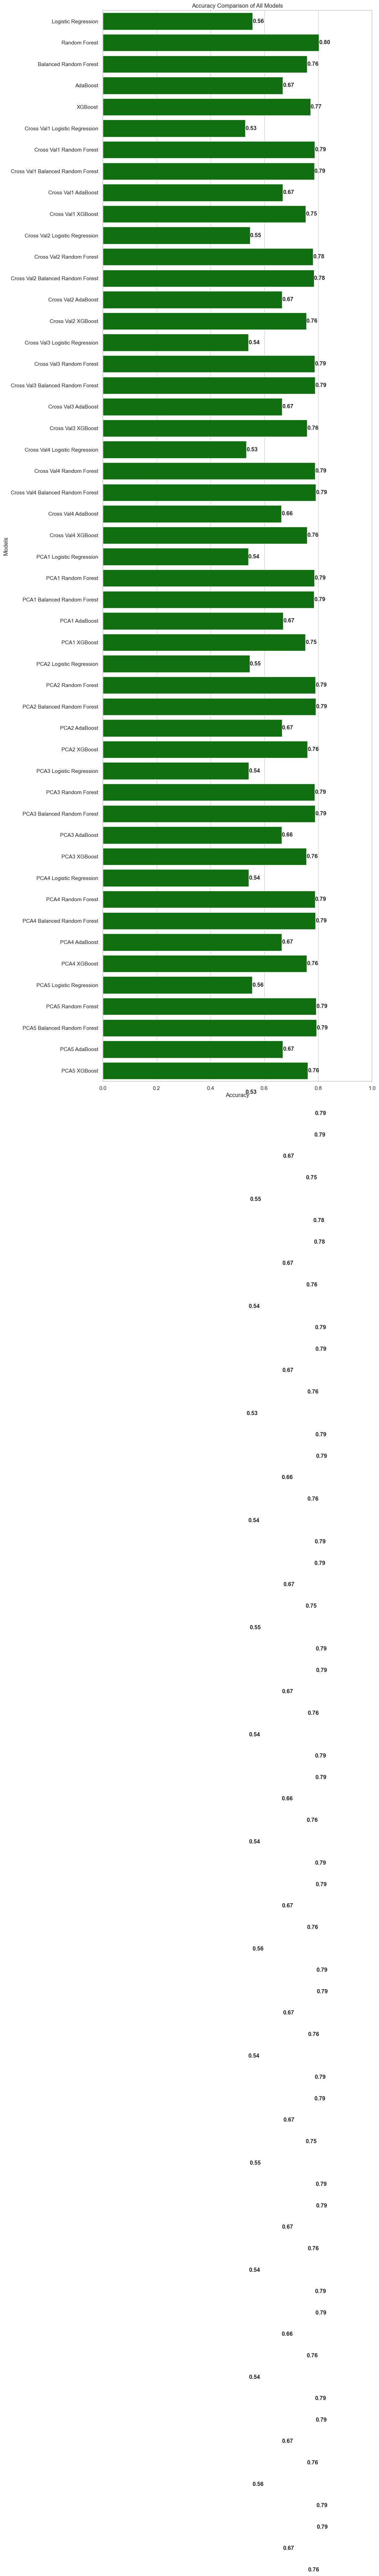

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame to hold the data
data = pd.DataFrame({'Model': Model_Names, 'Accuracy': Accuracy_Scores})

# Set the style of the plot using Seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(10,40))
ax = sns.barplot(x="Accuracy", y="Model", data=data, color="green")
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Accuracy Comparison of All Models')
plt.xlim(0, 1)  # Set the limit of x to 1 because accuracy is in the range [0, 1]

# Add labels to the bars
for index, row in data.iterrows():
    ax.text(row['Accuracy'], index, f'{row["Accuracy"]:.2f}', ha='left',fontweight= 'bold', va='center')


plt.show()